In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, roc_curve, auc,
)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
# Data Collection
df = pd.read_csv("Iris.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the dataset:-\n", df.head())

First 5 rows of the dataset:-
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# Data Preprocessing

In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  150
No. of column in the dataset:  5


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Finding Unique categories of Species column
print("Types of Species: ", df['Species'].unique())

Types of Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
# Mapping Categorical column with float64 values
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
print("Checking Dataset after mapping:-\n", df.tail())

Checking Dataset after mapping:-
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2


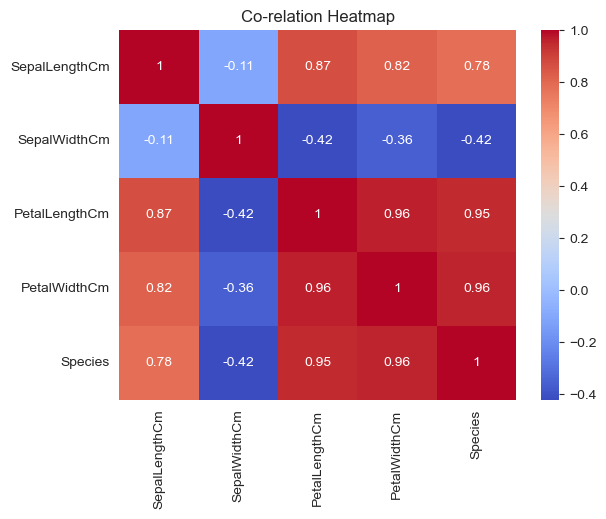

In [8]:
# Plotting the Co-relation between different features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Co-relation Heatmap")
plt.show()

In [9]:
# Features and target variable selection
features = df.drop('Species', axis='columns')
target = df.Species

In [10]:
# Checking for NaN values
features.columns[features.isna().any()]

Index([], dtype='object')

In [11]:
# Standardize the dataset using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [12]:
# Split the dataset into training and testing sets(80% training, 20%testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Display the size of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples \nTest set size: {X_test.shape[0]} samples')

Training set size: 120 samples 
Test set size: 30 samples


# WITHOUT FEATURE DIMENSIONALITY REDUCTION

In [13]:
import xgboost as xgb
from sklearn import ensemble
# Define models
models = {
    "XGBoost": xgb.XGBClassifier(),
    "Adaboost SVM": ensemble.AdaBoostClassifier(estimator=SVC(probability=True, random_state=42))
}

In [14]:
# Results table without PCA
results_table = {
    "Model": [],
    "Accuracy": [],
    "Sensitivity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

In [15]:
# Evaluate each model without PCA and populate the results table
for model_name, model in models.items():

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, zero_division=0, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics to the results table
    results_table["Model"].append(model_name)
    results_table["Accuracy"].append(accuracy)
    results_table["Sensitivity"].append(sensitivity)
    results_table["Precision"].append(precision)
    results_table["F1 Score"].append(f1)
    results_table["MCC"].append(mcc)

# Create a DataFrame from the results table
df_results = pd.DataFrame(results_table)

# Display the table
print("Table1: Results without PCA:-\n")
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

Table1: Results without PCA:-

+--------------+----------+-------------+-----------+----------+-----+
|    Model     | Accuracy | Sensitivity | Precision | F1 Score | MCC |
+--------------+----------+-------------+-----------+----------+-----+
|   XGBoost    |   1.0    |     1.0     |    1.0    |   1.0    | 1.0 |
| Adaboost SVM |   1.0    |     1.0     |    1.0    |   1.0    | 1.0 |
+--------------+----------+-------------+-----------+----------+-----+


In [16]:
# Find the index of the row with the highest accuracy
best_index = df_results["Accuracy"].idxmax()

# Extract the information about the best classifier
best_classifier_name = df_results.loc[best_index, "Model"]
best_classifier_accuracy = df_results.loc[best_index, "Accuracy"]

# Print conclusion
print(f"The best classifier is '{best_classifier_name}' with an accuracy of {best_classifier_accuracy:.2%}.")

The best classifier is 'XGBoost' with an accuracy of 100.00%.


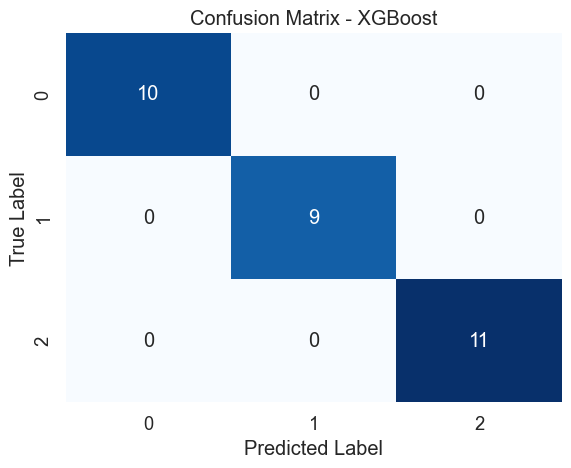

In [17]:
# Access the best classifier
best_classifier = models[best_classifier_name]

# Train the best classifier
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for the best classifier
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name}")
plt.show()

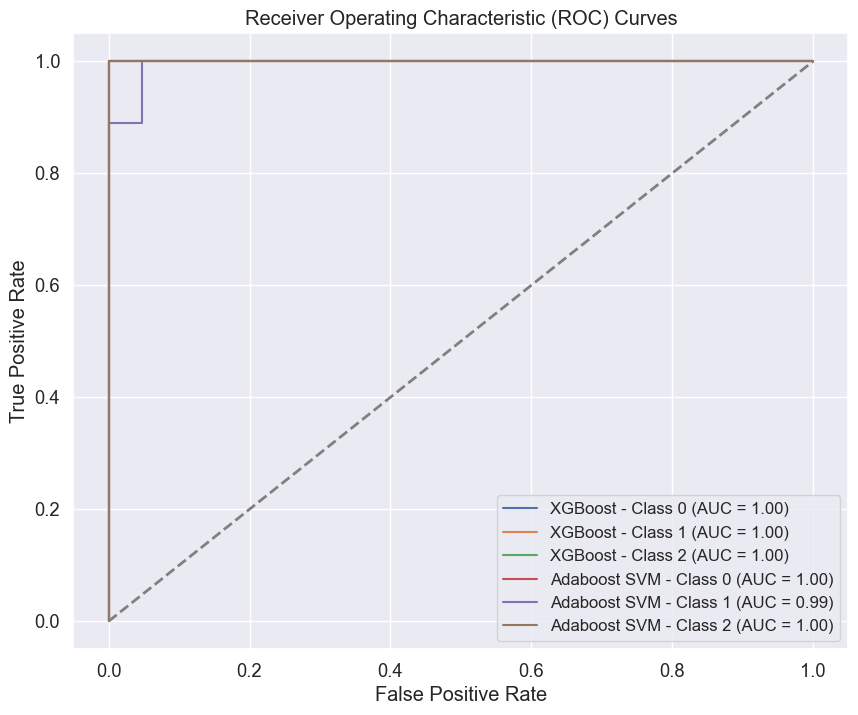

In [18]:
from sklearn.preprocessing import label_binarize

# Convert y_test to binary format for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)

    # Assuming y_score is an array where each column corresponds to a class
    for i, class_label in enumerate(np.unique(y_test)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} - Class {class_label} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(fontsize='small')
plt.show()

# WITH FEATURE DIMENSIONALITY REDUCTION TECHNIQUE (PCA)

In [19]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

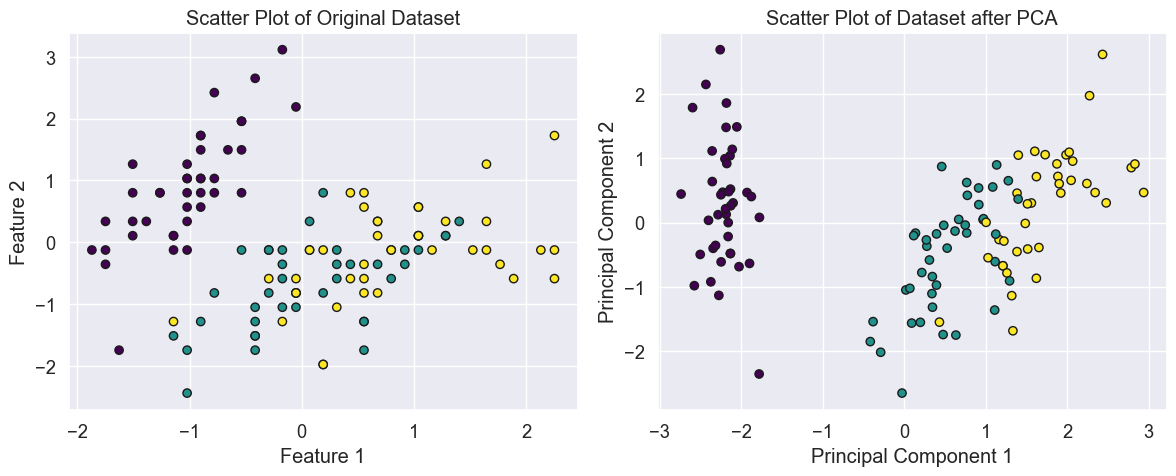

In [20]:
# Scatter plot for the original dataset and dataset after applying PCA
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for the original dataset
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[0].set_title('Scatter Plot of Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Scatter plot for the dataset after applying PCA
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k')
axs[1].set_title('Scatter Plot of Dataset after PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [21]:
# Create a table to store the results with PCA
results_table_pca = {
    "Model": [],  # Combined Model and PCA
    "Num Features": [],  # New column for Number of Features
    "Accuracy": [],
    "Sensitivity": [],
    "Precision": [],
    "F1 Score": [],
    "MCC": []
}

In [22]:
# Evaluate each model with PCA and populate the results table
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred_pca = model.predict(X_test_pca)

    # Evaluate performance metrics
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    sensitivity_pca = recall_score(y_test, y_pred_pca, average='macro')
    precision_pca = precision_score(y_test, y_pred_pca, zero_division=0, average='macro')    # Handle zero division
    f1_pca = f1_score(y_test, y_pred_pca, average='macro')
    mcc_pca = matthews_corrcoef(y_test, y_pred_pca)

    # Fill in the results table
    results_table_pca["Model"].append(f'PCA + {model_name}')
    results_table_pca["Num Features"].append(X_train_pca.shape[1])  # Number of PCA features
    results_table_pca["Accuracy"].append(accuracy_pca)
    results_table_pca["Sensitivity"].append(sensitivity_pca)
    results_table_pca["Precision"].append(precision_pca)
    results_table_pca["F1 Score"].append(f1_pca)
    results_table_pca["MCC"].append(mcc_pca)

# Create a DataFrame from the results table
df_results_pca = pd.DataFrame(results_table_pca)

# Display the table
print("Table2: Results with PCA:-\n")
print(tabulate(df_results_pca, headers='keys', tablefmt='pretty', showindex=False))

Table2: Results with PCA:-

+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       Model        | Num Features |      Accuracy      |    Sensitivity     |     Precision      |      F1 Score      |        MCC         |
+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   PCA + XGBoost    |      2       | 0.9333333333333333 | 0.9326599326599326 | 0.9326599326599326 | 0.9326599326599326 | 0.8996655518394648 |
| PCA + Adaboost SVM |      2       |        0.9         | 0.8956228956228957 | 0.9027777777777778 | 0.8976982097186701 | 0.8504309779358042 |
+--------------------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+


In [23]:
# Find the index of the row with the highest accuracy with PCA
best_index_pca = df_results_pca["Accuracy"].idxmax()

# Extract the information about the best classifier with PCA
best_classifier_name_pca = df_results_pca.loc[best_index_pca, "Model"]
best_classifier_accuracy_pca = df_results_pca.loc[best_index_pca, "Accuracy"]

# Print conclusion with PCA
print(f"The best classifier with PCA is '{best_classifier_name_pca}' with an accuracy of {best_classifier_accuracy_pca:.2%}.")

The best classifier with PCA is 'PCA + XGBoost' with an accuracy of 93.33%.


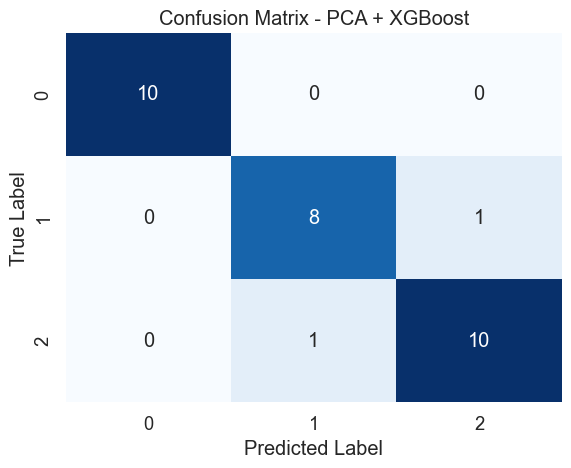

In [24]:
# Access the best classifie
best_classifier_pca = models[best_classifier_name_pca.split('PCA + ')[-1]]

# Train the best classifier
best_classifier_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = best_classifier_pca.predict(X_test_pca)

# Compute confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot confusion matrix for the best classifier
sns.set(font_scale=1.2)
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_classifier_name_pca}")
plt.show()

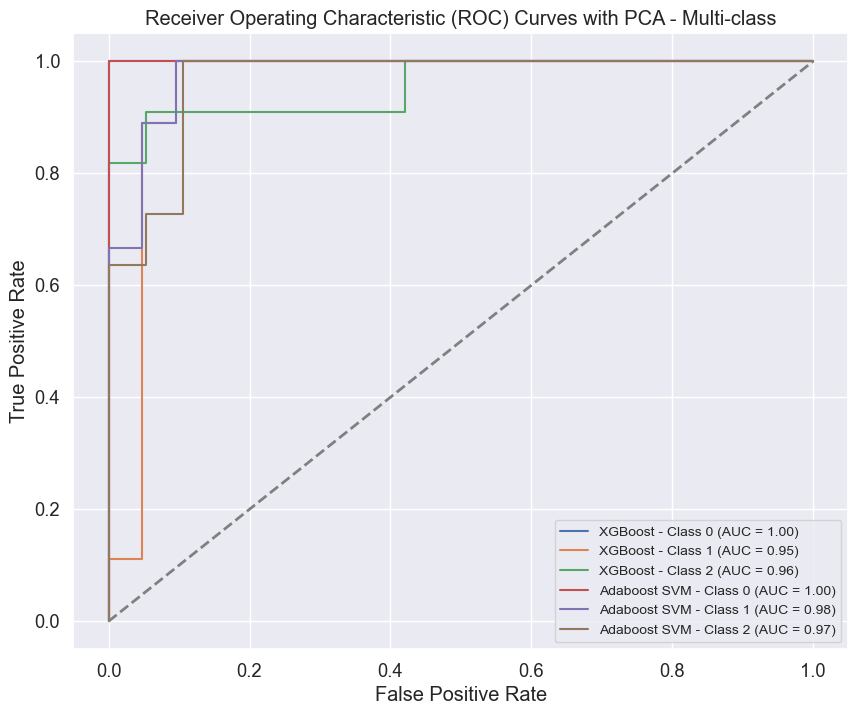

In [25]:
# Convert y_test to binary format for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC curves for all models with PCA
plt.figure(figsize=(10, 8))

for name, clf in models.items():
    clf.fit(X_train_pca, y_train)
    y_score_pca = clf.predict_proba(X_test_pca)

    # Assuming y_score_pca is an array where each column corresponds to a class
    for i, class_label in enumerate(np.unique(y_test)):
        fpr_pca, tpr_pca, _ = roc_curve(y_test_bin[:, i], y_score_pca[:, i])
        roc_auc_pca = auc(fpr_pca, tpr_pca)
        plt.plot(fpr_pca, tpr_pca, label=f'{name} - Class {class_label} (AUC = {roc_auc_pca:.2f})')

# Plot the diagonal line for PCA
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with PCA - Multi-class')
plt.legend(fontsize='x-small')
plt.show()

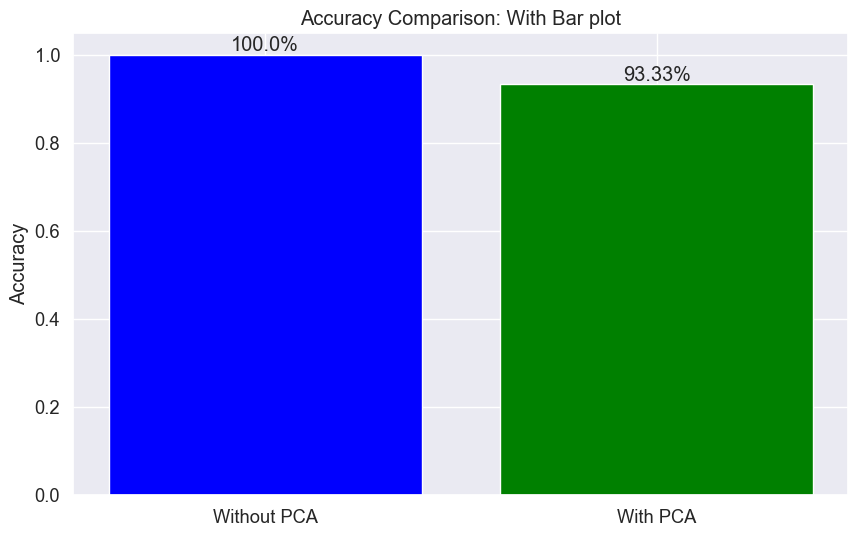

In [26]:
# Bar plot for accuracy comparison between the best model of each category
plt.figure(figsize=(10, 6))
bars = plt.bar(["Without PCA", "With PCA"], [best_classifier_accuracy, best_classifier_accuracy_pca], color=['blue', 'green'])

# Add values inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval * 100, 2)}%", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: With Bar plot")
plt.show()

# Author information and copyright

# -*- coding: utf-8 -*-
@Author: Shankar Singh Mahanty
Type: Confidential [CGU Internal ML Lab Test]
Copyright © 2023 C.V. Raman Global University. All Rights Reserved.